In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
os.chdir('C:\\Users\\Gudavalli\\Desktop\\IIDT\\MACHINE LEARNING\\logistic regression')

In [3]:
#Hypothesis in logistic regression
#beta1=beta2=beat3=0 (null hypothesis)

HR Data: Predict the probability that an employee will leave the organization.

In [4]:
hr=pd.read_csv('hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr.shape

(14999, 10)

In [6]:
#finding the summary for time spend in the company.
hr['time_spend_company'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

In [7]:
hr['Work_accident'].unique()

array([0, 1], dtype=int64)

In [8]:
hr['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
#Data Preparation
#Rename 'sales' column
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [10]:
hr.rename(columns={'sales':'Department'},inplace=True)
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
train['left'].value_counts()/train['left'].shape[0]

NameError: name 'train' is not defined

In [12]:
#Sanity check
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Train and Test split
1. Train: Teach/train the model using past data.
2. Test: Check how well model is working on new data.

In [13]:
#here frac represents the amount of observations that need to be selected
#it has by default does random sampling
#random_state is done to fix the same sample
train=hr.sample(frac=0.75,random_state=1)
train.shape

(11249, 10)

In [14]:
#length of train index
len(train.index)

11249

In [15]:
# here we need to  specify index beacuse training set values may shift so specify index
test=hr.drop(train.index)

In [16]:
print(train.shape)
print(test.shape)

(11249, 10)
(3750, 10)


In [17]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [18]:
train=pd.get_dummies(train,prefix_sep='')
train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'DepartmentIT', 'DepartmentRandD',
       'Departmentaccounting', 'Departmenthr', 'Departmentmanagement',
       'Departmentmarketing', 'Departmentproduct_mng', 'Departmentsales',
       'Departmentsupport', 'Departmenttechnical', 'salaryhigh', 'salarylow',
       'salarymedium'],
      dtype='object')

In [19]:
glm1=smf.glm('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+Departmentaccounting+DepartmentIT+Departmentmanagement+Departmentmarketing+Departmentproduct_mng+DepartmentRandD+Departmentsales+Departmentsupport+Departmenttechnical+salarylow+salarymedium',data=train,family=sm.families.Binomial()).fit()
print(glm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11230
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4811.1
Date:                Tue, 11 Feb 2020   Deviance:                       9622.1
Time:                        12:15:25   Pearson chi2:                 1.04e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.14

In [20]:
#akaike information criteria
#smalest AIC is considered and selected.
glm1.aic

9660.13900961272

In [21]:
glm2=smf.glm('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+Departmentaccounting+DepartmentIT+Departmentmanagement+Departmentmarketing+Departmentproduct_mng+DepartmentRandD+Departmentsales+Departmentsupport+Departmenthr+salarylow+salarymedium',data=train,family=sm.families.Binomial()).fit()
print(glm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11230
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4811.1
Date:                Tue, 11 Feb 2020   Deviance:                       9622.1
Time:                        12:15:26   Pearson chi2:                 1.04e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.36

In [22]:
glm2.aic

9660.139009612722

In [23]:
glm3=smf.glm('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+DepartmentIT+Departmentmanagement+Departmentmarketing+Departmentproduct_mng+DepartmentRandD+Departmentsales+salarylow+salarymedium',data=train,family=sm.families.Binomial()).fit()
print(glm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11233
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4813.8
Date:                Tue, 11 Feb 2020   Deviance:                       9627.6
Time:                        12:15:31   Pearson chi2:                 1.04e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.35

In [24]:
glm3.aic

9659.57972225939

In [25]:
glm4=smf.glm('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+DepartmentRandD+salarylow+salarymedium',data=train,family=sm.families.Binomial()).fit()
print(glm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11238
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4821.6
Date:                Tue, 11 Feb 2020   Deviance:                       9643.3
Time:                        12:15:33   Pearson chi2:                 1.04e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.48

In [70]:
train.shape

(11249, 21)

In [26]:
glm4.aic

9665.26047941935

In [27]:
glm4.model.exog.shape

(11249, 11)

In [28]:
#Multicollinearity check
#exog represents all the independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
idv = glm4.model.exog
vif = [variance_inflation_factor(idv, i) for i in range(idv.shape[1])]

pd.DataFrame({'Features':glm4.model.exog_names,'vif':vif})

,Features,vif
0,Intercept,47.924006
1,satisfaction_level,1.069403
2,last_evaluation,1.248464
3,number_project,1.359022
4,average_montly_hours,1.272947
5,time_spend_company,1.065938
6,Work_accident,1.006178
7,promotion_last_5years,1.017090
8,DepartmentRandD,1.002175
9,salarylow,3.619342


In [29]:
#Prediction on new data
test=pd.get_dummies(test,prefix_sep='')
test.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'DepartmentIT', 'DepartmentRandD',
       'Departmentaccounting', 'Departmenthr', 'Departmentmanagement',
       'Departmentmarketing', 'Departmentproduct_mng', 'Departmentsales',
       'Departmentsupport', 'Departmenttechnical', 'salaryhigh', 'salarylow',
       'salarymedium'],
      dtype='object')

In [73]:
test.drop('left',axis=1,inplace=True)

In [76]:
test.drop('deciles',axis=1,inplace=True)

In [78]:
test.drop('prob',axis=1,inplace=True)

In [79]:
test.shape

(3750, 20)

In [30]:
#predicting the probabilities.
test['prob']=glm4.predict(test)
test['prob'].head()

0     0.543226
2     0.543150
14    0.547507
15    0.529666
18    0.047055
Name: prob, dtype: float64

In [31]:
pred_y=glm4.predict(test).map(lambda x:1 if x>0.5 else 0)
pred_y.head()

0     1
2     1
14    1
15    1
18    0
dtype: int64

In [32]:
#Accuracy: Confusion Matrix,ROC, AUC
#Confusion matrix
from sklearn import metrics
metrics.confusion_matrix(test['left'],pred_y)

array([[2666,  200],
       [ 556,  328]], dtype=int64)

In [33]:
#ROC curve
fpr,tpr,thresholds=metrics.roc_curve(test['left'],test['prob'])
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)

Text(0.5, 1.0, 'ROC Curve')

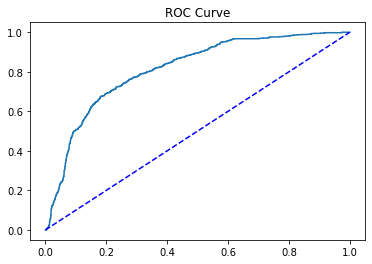

In [34]:
plt.plot(fpr,tpr)
plt.plot(x,y,'b--')#here b-- represents it must be in blue and in -'s
plt.title("ROC Curve")

In [35]:
# AUC
metrics.roc_auc_score(test['left'],test['prob'])

0.8125913739804795

In [36]:
#Gains chart
#here we will take a random of 10 groups(q)
test['deciles']=pd.qcut(test['prob'],q=10)
test['deciles'].head()

0       (0.423, 0.559]
2       (0.423, 0.559]
14      (0.423, 0.559]
15      (0.423, 0.559]
18    (0.0312, 0.0602]
Name: deciles, dtype: category
Categories (10, interval[float64]): [(2.0000000000000052e-05, 0.0312] < (0.0312, 0.0602] < (0.0602, 0.0895] < (0.0895, 0.127] ... (0.221, 0.308] < (0.308, 0.423] < (0.423, 0.559] < (0.559, 0.867]]

In [37]:
len(test['deciles'].unique())

10

In [38]:
test_sort=test.sort_values('prob',ascending=False).head()
test_sort.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,DepartmentIT,DepartmentRandD,...,Departmentmarketing,Departmentproduct_mng,Departmentsales,Departmentsupport,Departmenttechnical,salaryhigh,salarylow,salarymedium,prob,deciles
5651,0.15,0.76,4,255,6,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.866807,"(0.559, 0.867]"
2086,0.12,0.87,4,244,5,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0.854862,"(0.559, 0.867]"
3559,0.15,0.52,4,265,6,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0.850482,"(0.559, 0.867]"
11686,0.36,0.41,3,167,10,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0.845433,"(0.559, 0.867]"
11581,0.57,0.93,2,204,10,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.844812,"(0.559, 0.867]"


In [39]:
gains=test.groupby('deciles')['left'].agg(['sum','count']).reset_index().sort_values("deciles",ascending=False)
gains

,deciles,sum,count
9,"(0.559, 0.867]",216,374
8,"(0.423, 0.559]",234,376
7,"(0.308, 0.423]",147,375
6,"(0.221, 0.308]",82,375
5,"(0.167, 0.221]",64,375
4,"(0.127, 0.167]",51,375
3,"(0.0895, 0.127]",60,374
2,"(0.0602, 0.0895]",9,376
1,"(0.0312, 0.0602]",12,375
0,"(2.0000000000000052e-05, 0.0312]",9,375


In [40]:
gains.columns=['Deciles','TotalEvents','NObs']

In [41]:
gains['Percentage']=gains['TotalEvents']/gains['TotalEvents'].sum()

In [42]:
gains

,Deciles,TotalEvents,NObs,Percentage
9,"(0.559, 0.867]",216,374,0.244344
8,"(0.423, 0.559]",234,376,0.264706
7,"(0.308, 0.423]",147,375,0.166290
6,"(0.221, 0.308]",82,375,0.092760
5,"(0.167, 0.221]",64,375,0.072398
4,"(0.127, 0.167]",51,375,0.057692
3,"(0.0895, 0.127]",60,374,0.067873
2,"(0.0602, 0.0895]",9,376,0.010181
1,"(0.0312, 0.0602]",12,375,0.013575
0,"(2.0000000000000052e-05, 0.0312]",9,375,0.010181


In [43]:
#cummulative value is done percentage
gains['cum_events']=gains['Percentage'].cumsum()
gains['sample']=np.arange(0.1,1.1,0.1)
gains

,Deciles,TotalEvents,NObs,Percentage,cum_events,sample
9,"(0.559, 0.867]",216,374,0.244344,0.244344,0.1
8,"(0.423, 0.559]",234,376,0.264706,0.509050,0.2
7,"(0.308, 0.423]",147,375,0.166290,0.675339,0.3
6,"(0.221, 0.308]",82,375,0.092760,0.768100,0.4
5,"(0.167, 0.221]",64,375,0.072398,0.840498,0.5
4,"(0.127, 0.167]",51,375,0.057692,0.898190,0.6
3,"(0.0895, 0.127]",60,374,0.067873,0.966063,0.7
2,"(0.0602, 0.0895]",9,376,0.010181,0.976244,0.8
1,"(0.0312, 0.0602]",12,375,0.013575,0.989819,0.9
0,"(2.0000000000000052e-05, 0.0312]",9,375,0.010181,1.000000,1.0


Text(0.5, 1.0, 'Gains Chart')

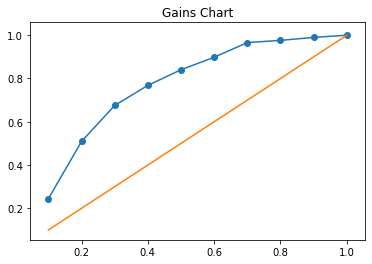

In [44]:
plt.scatter(gains['sample'],gains['cum_events'])
plt.plot(gains['sample'],gains['cum_events'])
plt.plot(gains['sample'],gains['sample'])
plt.title("Gains Chart")

In [45]:
#stepwise selection:(another method of finding)
%run step.py

<Figure size 432x288 with 0 Axes>

In [46]:
features=stepwise_selection(train.drop('left',axis=1),train['left'])
features

C:\Users\Gudavalli\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Gudavalli\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Gudavalli\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Gudavalli\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Gudavalli\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning

Add  satisfaction_level             with p-value 0.0
Add  Work_accident                  with p-value 8.1936e-56
Add  salarylow                      with p-value 5.84362e-44
Add  time_spend_company             with p-value 6.82309e-39
Add  salarymedium                   with p-value 7.02128e-22
Add  number_project                 with p-value 7.70818e-11
Add  average_montly_hours           with p-value 2.91185e-20
Add  promotion_last_5years          with p-value 8.22603e-06
Add  DepartmentRandD                with p-value 0.000126605
Add  last_evaluation                with p-value 0.000126214
Add  Departmenthr                   with p-value 0.00307879
Add  Departmentmanagement           with p-value 0.00628763


['satisfaction_level',
 'Work_accident',
 'salarylow',
 'time_spend_company',
 'salarymedium',
 'number_project',
 'average_montly_hours',
 'promotion_last_5years',
 'DepartmentRandD',
 'last_evaluation',
 'Departmenthr',
 'Departmentmanagement']

In [47]:
len(features)

12

In [48]:
final=sm.GLM(train['left'],train[features],family=sm.families.Binomial()).fit()
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11237
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4843.0
Date:                Tue, 11 Feb 2020   Deviance:                       9686.0
Time:                        12:16:01   Pearson chi2:                 1.10e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -4.3970      0.109    -40.231      0.000      -4.611      -4.183
Work_accident            -1.5936      0.105    -15.147      0.000      -1.800      -1.387
salarylow                 1.2503      0.094     13.239      0.000       1.065       1.435
time_spend_company        0.2253      0.017     13.069      0.000       0.192       0.259
salarymedium              0.7026      0.097      7.256      0.000       0.513       0.892
number_project           -0.3261      0.024    -13.358      0.000      -0.374      -0.278
average_montly_hours      0.0032      0.001      5.635      0.000       0.002       0.004
promotion_last_5years    -1.3418      0.283     -4.739      0.000      -1.897      -0.787
DepartmentRandD          -0.4905      0.127     -3.860      0.000      -0.740      -0.241
last_evaluation           0.4427      0.166      2.661      0.008       0.117       0.769
Departmenthr              0.2744      0.110      2.495      0.013       0.059       0.490
Departmentmanagement     -0.4565      0.149     -3.065      0.002      -0.748      -0.165
=========================================================================================
"""

In [49]:
#AUC
pred=final.predict(test[features])
metrics.roc_auc_score(test['left'],pred)

0.8059544258951097

In [50]:
final1=sm.GLM(train['left'],train[features].drop('salarymedium',axis=1),family=sm.families.Binomial()).fit()
final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11238
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4870.7
Date:                Tue, 11 Feb 2020   Deviance:                       9741.3
Time:                        12:16:12   Pearson chi2:                 1.07e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -4.2220      0.106    -39.896      0.000      -4.429      -4.015
Work_accident            -1.5792      0.105    -15.005      0.000      -1.785      -1.373
salarylow                 0.6833      0.050     13.623      0.000       0.585       0.782
time_spend_company        0.2445      0.017     14.486      0.000       0.211       0.278
number_project           -0.3151      0.024    -12.941      0.000      -0.363      -0.267
average_montly_hours      0.0041      0.001      7.458      0.000       0.003       0.005
promotion_last_5years    -1.3929      0.285     -4.880      0.000      -1.952      -0.833
DepartmentRandD          -0.4650      0.127     -3.676      0.000      -0.713      -0.217
last_evaluation           0.7012      0.162      4.329      0.000       0.384       1.019
Departmenthr              0.3234      0.109      2.969      0.003       0.110       0.537
Departmentmanagement     -0.5812      0.147     -3.950      0.000      -0.870      -0.293
=========================================================================================
"""

In [51]:
#auc
pred1=final1.predict(test[features].drop(['salarymedium'],axis=1))
metrics.roc_auc_score(test['left'],pred1)

0.8071373538411016

In [52]:
final2=sm.GLM(train['left'],train[features].drop(['salarymedium','salarylow'],axis=1),family=sm.families.Binomial()).fit()
final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11239
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4965.6
Date:                Tue, 11 Feb 2020   Deviance:                       9931.2
Time:                        12:16:13   Pearson chi2:                 1.05e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -4.0932      0.104    -39.399      0.000      -4.297      -3.890
Work_accident            -1.5409      0.104    -14.782      0.000      -1.745      -1.337
time_spend_company        0.2426      0.017     14.576      0.000       0.210       0.275
number_project           -0.3096      0.024    -12.795      0.000      -0.357      -0.262
average_montly_hours      0.0047      0.001      8.624      0.000       0.004       0.006
promotion_last_5years    -1.5134      0.284     -5.335      0.000      -2.069      -0.957
DepartmentRandD          -0.4829      0.126     -3.847      0.000      -0.729      -0.237
last_evaluation           0.9237      0.159      5.807      0.000       0.612       1.235
Departmenthr              0.2974      0.108      2.748      0.006       0.085       0.509
Departmentmanagement     -0.7207      0.146     -4.937      0.000      -1.007      -0.435
=========================================================================================
"""

In [53]:
#auc
pred2=final2.predict(test[features].drop(['salarymedium','salarylow'],axis=1))
metrics.roc_auc_score(test['left'],pred2)

0.8022013827271206

In [54]:
# in MACHINE LEARNING APPROACH
from sklearn.linear_model import LogisticRegression
binary=LogisticRegression()
binary.fit(train.drop('left',axis=1),train['left'])

C:\Users\Gudavalli\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
binary.score(train.drop('left',axis=1),train['left'])

0.7885145346253001

In [56]:
binary.score(test.drop(['prob','deciles','left'],axis=1),test['left'])

0.7946666666666666

# PCA

In [58]:
x_train=train.drop('left',axis=1)

In [80]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=4)
x1=pca.fit_transform(x_train)
x1.shape

(11249, 4)

In [81]:
pca.explained_variance_ratio_

array([9.98000279e-01, 8.72338108e-04, 4.71157993e-04, 1.82875110e-04])

In [82]:
np.sum(pca.explained_variance_ratio_)

0.9995266506516144

In [83]:
final1=sm.GLM(train['left'],x1,family=sm.families.Binomial()).fit()
final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                11249
Model:                            GLM   Df Residuals:                    11245
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7640.2
Date:                Tue, 11 Feb 2020   Deviance:                       15280.
Time:                        13:06:03   Pearson chi2:                 1.13e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0025      0.000      6.492      0.000       0.002       0.003
x2             0.1532      0.013     11.385      0.000       0.127       0.180
x3             0.0930      0.018      5.227      0.000       0.058       0.128
x4             0.2993      0.028     10.570      0.000       0.244       0.355
==============================================================================
"""

In [65]:
#AUC
from sklearn import metrics
pred=final1.predict(x1)
metrics.roc_auc_score(train['left'],pred)

0.6534114395950915

In [87]:
test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,DepartmentIT,DepartmentRandD,Departmentaccounting,Departmenthr,Departmentmanagement,Departmentmarketing,Departmentproduct_mng,Departmentsales,Departmentsupport,Departmenttechnical,salaryhigh,salarylow,salarymedium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
14,0.36,0.56,2,137,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
15,0.38,0.54,2,143,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
18,0.45,0.51,2,160,3,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [91]:
x_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,DepartmentIT,DepartmentRandD,Departmentaccounting,Departmenthr,Departmentmanagement,Departmentmarketing,Departmentproduct_mng,Departmentsales,Departmentsupport,Departmenttechnical,salaryhigh,salarylow,salarymedium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
14,0.36,0.56,2,137,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
15,0.38,0.54,2,143,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
18,0.45,0.51,2,160,3,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [92]:
x2=pca.transform(x_test)

In [97]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=4)
x2=pca.fit_transform(x_test)
x2.shape

(3750, 4)

In [100]:
model=sm.GLM(x_test,x2,family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                                                                                                                                                                Generalized Linear Model Regression Results                                                                                                                                                                                                                 
============================================================================================================================================================================================================================================================================================================================================================================================================================================================================
Dep. Variable:     ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'DepartmentIT', 'DepartmentRandD', 'Departmentaccounting', 'Departmenthr', 'Departmentmanagement', 'Departmentmarketing', 'Departmentproduct_mng', 'Departmentsales', 'Departmentsupport', 'Departmenttechnical', 'salaryhigh', 'salarylow', 'salarymedium']   No. Observations:                 3750
Model:                                                                                                                                                                                                                                                                                                                                                                                                                          GLM   Df Residuals:                     3746
Model Family:                                                                                                                                                                                                                                                                                                                                                                                                              Binomial   Df Model:                            3
Link Function:                                                                                                                                                                                                                                                                                                                                                                                                                logit   Scale:                          1.0000
Method:                                                                                                                                                                                                                                                                                                                                                                                                                        IRLS   Log-Likelihood:            -5.1465e+05
Date:                                                                                                                                                                                                                                                                                                                                                                                                              Tue, 11 Feb 2020   Deviance:                   1.0236e+06
Time:                                                                                                                                                                                                                                                                   